In [52]:
import pandas as pd
import numpy as np

Loading the CSV File

In [53]:
df_initial = pd.read_csv("Telco-Customer-Churn.csv")

In [54]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
df_initial[0:2]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [56]:
df_initial['TotalCharges'] = pd.to_numeric(df_initial['TotalCharges'], errors= 'coerce')

In [57]:
print(df_initial['Churn'].value_counts(normalize= True)*100)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hatif Neyaz\AppData\Local\Temp\ipykernel_12072\2047476968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data= df_initial, palette= 'viridis')


([<matplotlib.axis.XTick at 0x2059ebce5d0>,
 [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

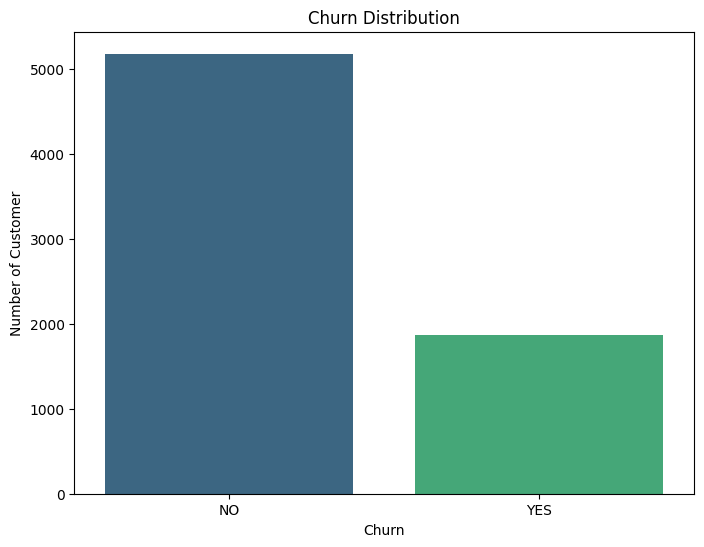

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(x='Churn', data= df_initial, palette= 'viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customer')
plt.xticks([0,1], ['NO', 'YES'])

In [60]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

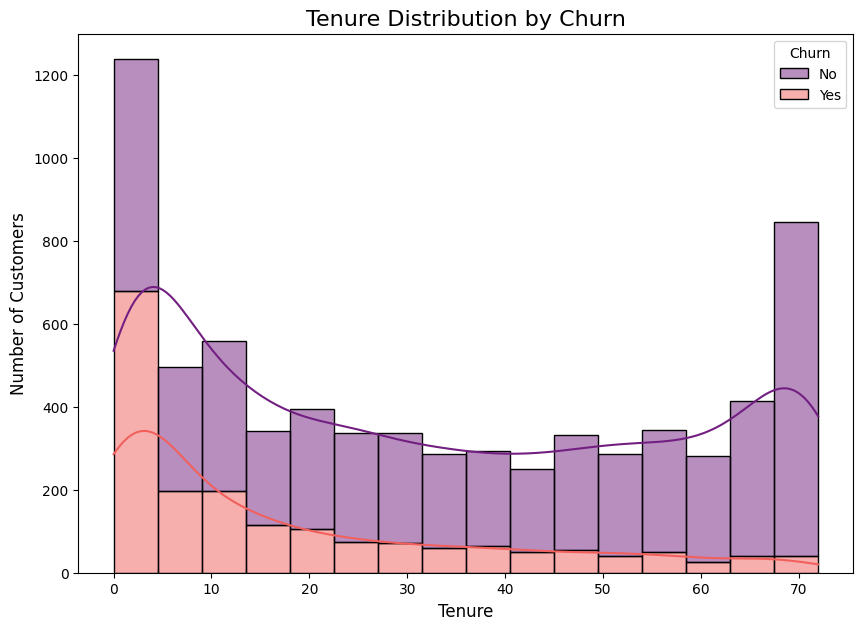

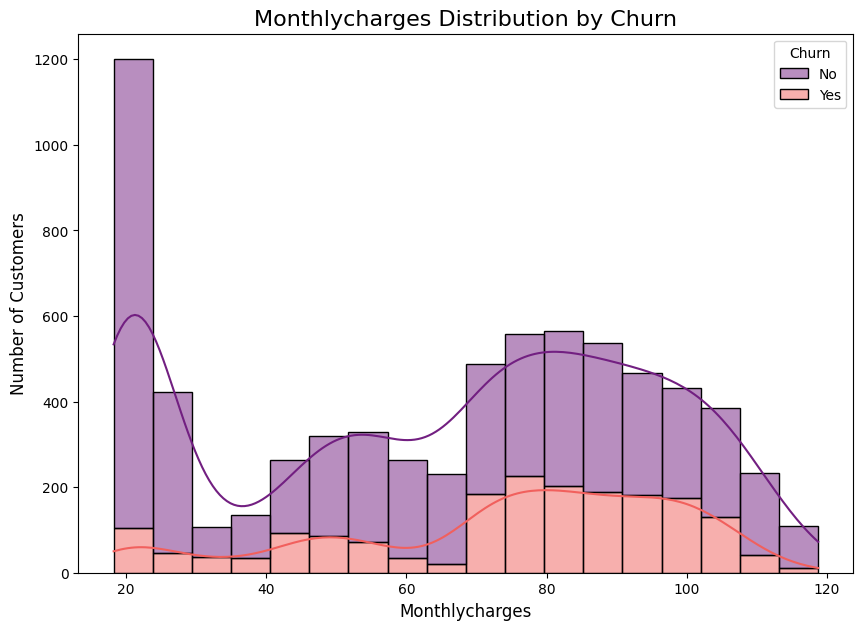

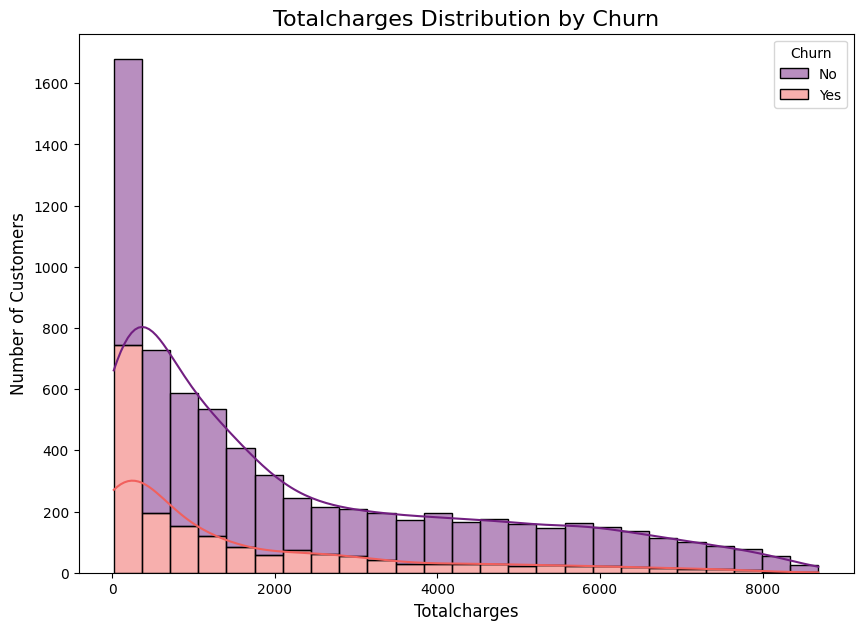

In [61]:
for feature in numerical_features:
    plt.figure(figsize=(10, 7))
    sns.histplot(data=df_initial, x=feature, hue='Churn', multiple='stack', kde=True, palette='magma')
    plt.title(f'{feature.capitalize()} Distribution by Churn', fontsize=16)
    plt.xlabel(f'{feature.capitalize()}', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)

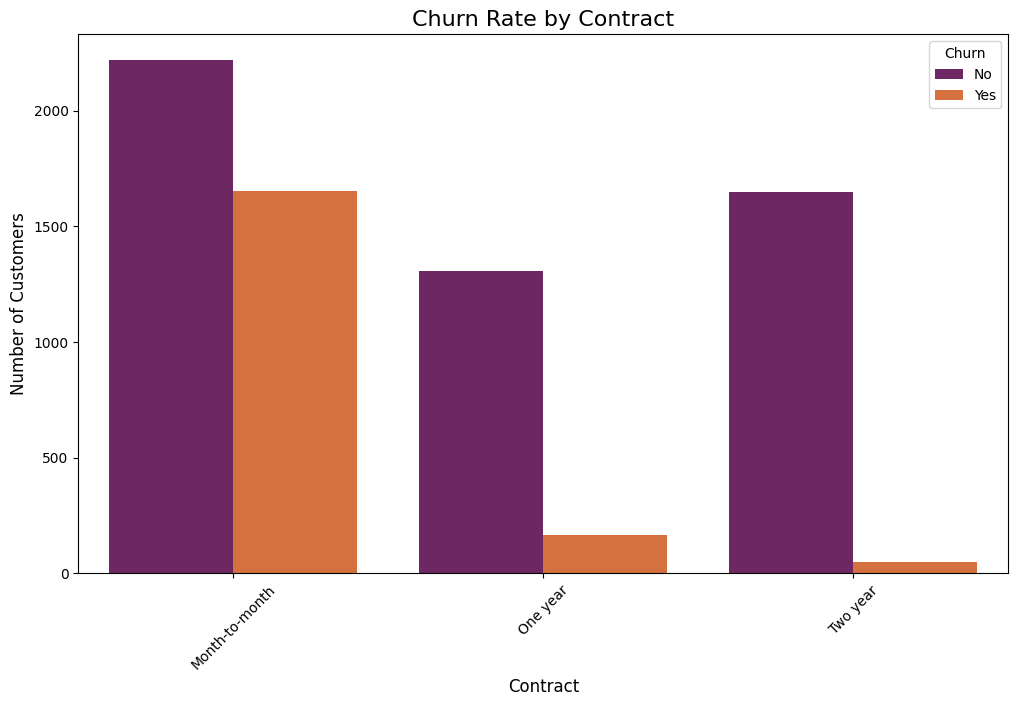

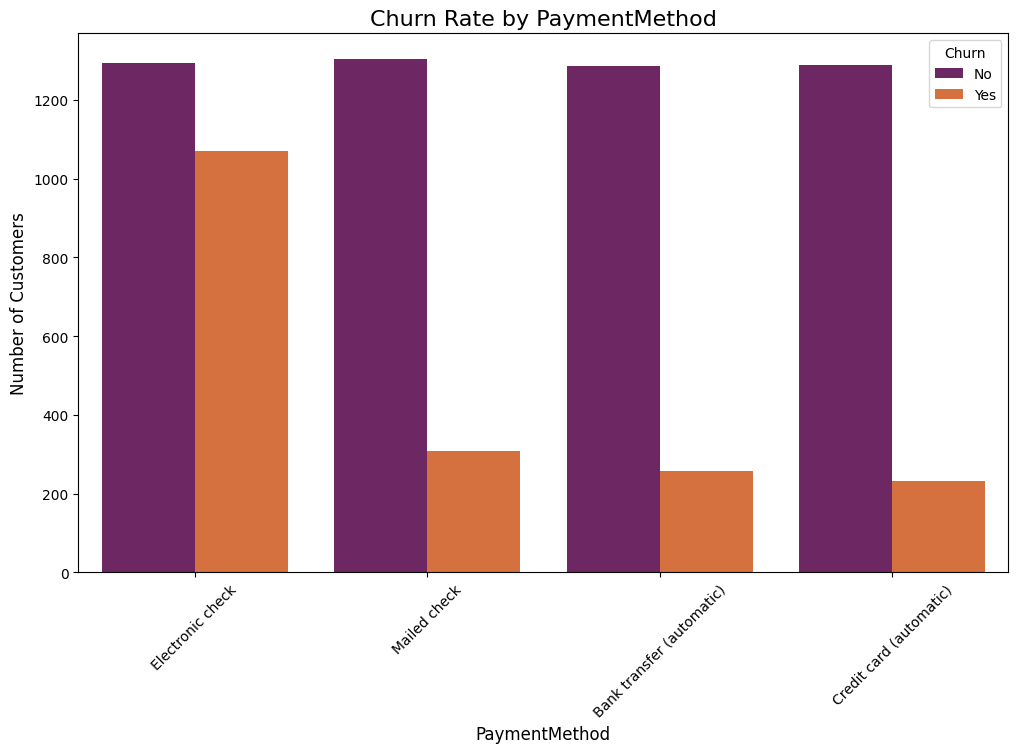

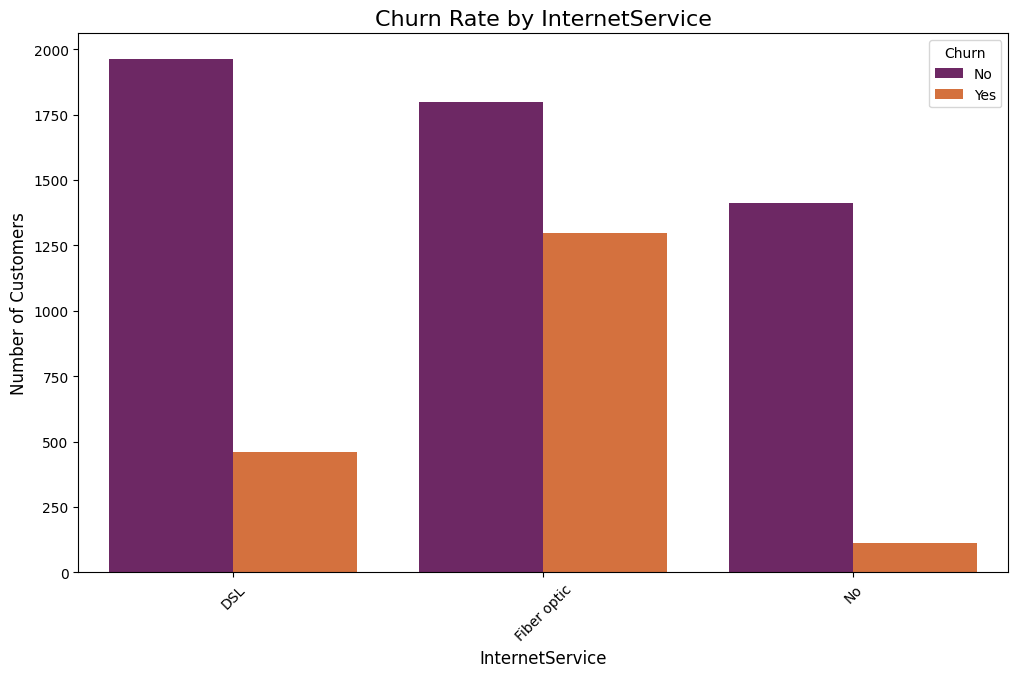

In [62]:
categorical_features = ['Contract', 'PaymentMethod', 'InternetService']

for feature in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df_initial, x=feature, hue='Churn', palette='inferno')
    plt.title(f'Churn Rate by {feature}', fontsize=16)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks(rotation=45)

In [63]:
df_initial['Churn'] = df_initial['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [64]:
df_initial.dropna(inplace=True)

In [65]:
df_initial.drop('customerID', axis=1, inplace=True)

In [66]:
# --- 3. Feature Engineering and Data Splitting ---
# Separate features (X) from the target variable (y)
X = df_initial.drop('Churn', axis=1)
y = df_initial['Churn']

In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [68]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
categorical_features.append('SeniorCitizen')

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
# Remove SeniorCitizen as we've added it to categorical, and also the target 'Churn' if it's there
numerical_features = [feat for feat in numerical_features if feat not in ['SeniorCitizen', 'Churn']]

# Create preprocessing pipelines for numerical and categorical features
# Numerical features will be scaled.
# Categorical features will be one-hot encoded.
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [69]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into training and testing sets: {X_train.shape[0]} train, {X_test.shape[0]} test.")

# --- 4. Apply Transformations and Convert to Tensors ---
# Fit the preprocessor on the training data and transform both train and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data (which might be a sparse matrix) to a dense NumPy array
X_train_processed = X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed
X_test_processed = X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed

# Convert NumPy arrays to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_processed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1) # Reshape for loss function
X_test_tensor = torch.tensor(X_test_processed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# --- 5. Define the PyTorch Neural Network ---
# The input size is the number of features after preprocessing
input_size = X_train_processed.shape[1]

class ChurnClassifier(nn.Module):
    def __init__(self, input_features):
        super(ChurnClassifier, self).__init__()
        # Define the layers of the network
        self.layer_1 = nn.Linear(input_features, 64) # 1st hidden layer
        self.layer_2 = nn.Linear(64, 32)            # 2nd hidden layer
        self.output_layer = nn.Linear(32, 1)        # Output layer
        
        self.relu = nn.ReLU() # Activation function
        self.sigmoid = nn.Sigmoid() # To get a probability output (0 to 1)

    def forward(self, x):
        # Define the forward pass
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.sigmoid(self.output_layer(x))
        return x


Data split into training and testing sets: 5625 train, 1407 test.


In [71]:
# Instantiate the model
model = ChurnClassifier(input_features=input_size)
print("\nPyTorch Model Architecture:")
print(model)


PyTorch Model Architecture:
ChurnClassifier(
  (layer_1): Linear(in_features=46, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [72]:
# Loss Function: Binary Cross-Entropy is suitable for binary classification
criterion = nn.BCELoss()
# Optimizer: Adam is a popular and effective choice
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [73]:
epochs = 50
batch_size = 64

In [74]:
train_data = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)


In [75]:
for epoch in range(epochs):
    for batch_inputs, batch_labels in train_loader:
        # Set the model to training mode
        model.train()
        
        # Forward pass: compute predicted y by passing x to the model
        y_pred = model(batch_inputs)

        # Compute loss
        loss = criterion(y_pred, batch_labels)
        
        # Zero gradients, perform a backward pass, and update the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 10 epochs for monitoring
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("--- Model Training Complete ---")

# --- 7. Evaluate the Model ---
# Set the model to evaluation mode (disables dropout, etc.)
model.eval()

# We don't need to compute gradients for evaluation
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    
    # Convert probabilities to binary predictions (0 or 1)
    predicted_classes = (y_pred_test > 0.5).float()
    
    # Calculate accuracy
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nModel Accuracy on Test Set: {accuracy.item()*100:.2f}%")

# --- 8. Save the Model and Preprocessor ---
# We need to save both the model's state and the preprocessor pipeline
# to use them for inference later in our Flask API.
torch.save(model.state_dict(), 'churn_model.pth')
print("\nPyTorch model state saved to 'churn_model.pth'")

import joblib
joblib.dump(preprocessor, 'preprocessor.joblib')
print("Preprocessor pipeline saved to 'preprocessor.joblib'")

Epoch [10/50], Loss: 0.4021
Epoch [20/50], Loss: 0.4065
Epoch [30/50], Loss: 0.4031
Epoch [40/50], Loss: 0.3922
Epoch [50/50], Loss: 0.2952
--- Model Training Complete ---

Model Accuracy on Test Set: 78.04%

PyTorch model state saved to 'churn_model.pth'
Preprocessor pipeline saved to 'preprocessor.joblib'
